# Analysing the numpy.random Package

## Introduction

In [2]:
# https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html
import numpy as np
import seaborn as sns

NumPy (shorthand for Numerical Python) is a package used in Python for working with multidimensional arrays and matrices. An array is a data structure that contains a group of elements. Typically these elements are all of the same data type, such as an integer or string. Arrays are commonly used in computer programs to organize data so that a related set of values can be easily sorted or searched. When we add differnet dimensions to these arrays, simple operations such as addition can become quite complex. This library allows us to preform mathematical operations on these complex structures [2]. It also enables arithmetic reading and writing operations on large arrays of data without the need to write for or while loops [1].

These multi dimensional array objects are know as ndarrays in numpy. Ndarrays are fast and flexible containers for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements[1]. NumPy can also be used with other packages such as matplotlib and Pandas to create plots and summarise stastical data.

An important part of any simulation is the ability to generate random numbers. For this reason, NumPy has the random submodule[3]. A random number generator can generate an array of numbers that cannot reasonably predicted better than by random chance. The numpy.random module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions[1]. For example, you can get a 4 × 4 array of samples from the standard normal distribution using normal:

In [4]:
example = np.random.normal(size=(4, 4))
example

array([[-1.08320208, -0.07478909, -1.56516569, -0.13982385],
       [-0.50080664,  0.90211497, -0.64876378, -0.00583632],
       [-1.5868568 ,  0.5209545 , -2.37226891, -0.49053515],
       [ 1.11793913, -1.69513175,  0.48972186,  0.13742339]])

Some simple examples of random number generators are rolling a dice, a roulette wheel or coin flipping. Random number generators have a wide range of applications. For example, if you are investigating a system, and you know the statistical properties of this system (eg a binomial distriubtion), you could save alot of time. Instead of collecting sample data, you could simply use numpy.random to generate data that would be similar to the systems distribution. Preforming an experiment using randomly generated data is called a simulation[4]. 

Generally the numpy.random package is used to generate various types and distributions of datasets, which in turn can be used in the development, evaluation and exploration of various libraries and analytical methods[5].

Numpy.random is very fast at generating sample data. In comparsion Python's standard random module will only sample one value at a time. If we look at the benchmark of these numpy.random is much faster for getting large samples[1]. This makes it very useful when we need large samples quickly.

In [9]:
from random import normalvariate
N = 1000000
# looking at built in random speed
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.27 s ± 49.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# looking at np.random speed
%timeit np.random.normal(size=N)

44.3 ms ± 345 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Simple Random Data
The sample random data functions are used to generate sequences of random numbers. For example the numpy.random.bytes will give us a number of random bytes in a string format of length 6

In [20]:
np.random.bytes(6)

b'QW\xa0\\\x16\xb7'

In the NumPy simple random functions documentation, there are ten functions listed for Random Sampling. Each of these functions lists different distributions that the data will be spread across; uniform, uniform sample, discrete uniform (additionally between low and high values), continuous uniform and standard normal distributions. 

In uniform distributions samples are evenly spread [9]. In standard normal distributions, there is a central tendancy, in other words the values tend to cluster around the mean, mode and median values [10]. 

Discrete data can only take particular values and can be seperated into classifications. Discrete data can be numeric -- like numbers of apples -- but it can also be categorical -- like red or blue, or male or female, or good or bad [11]. Continuous data has an infinate number of values in a specified range. It is quantitative and therefore can be counted. Continuous data are always essentially numeric [11].

 A good real world example of this would be simulating dice rolls using the randint function. In analysing dicerolls we would assume each face of the dice has an equal chance of occuring. Therefore it makes sense to use the randint function which will give us random integers in a uniform distribution

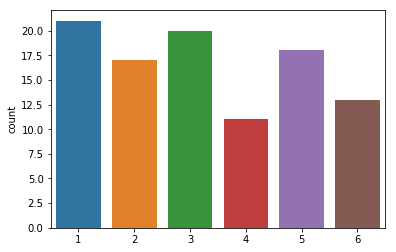

In [15]:
# 100 dice rolls
diceroll = np.random.randint(1, 7 ,size=(100))
# [7]
sns.countplot(diceroll)

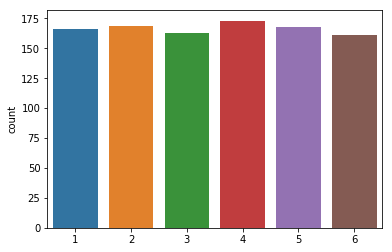

In [17]:
# 1000 dicerolls
diceroll1 = np.random.randint(1, 7 ,size=(1000))
sns.countplot(diceroll1)

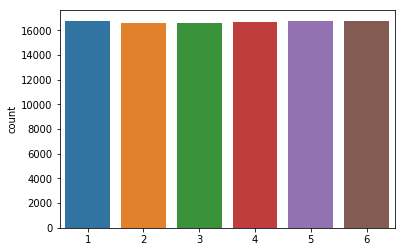

In [13]:
# 100000 dicerolls
diceroll2 = np.random.randint(1, 7, size = (100000))
sns.countplot(diceroll2)

In this example we use randint(1, 7) to generate an array of numbers between 1 and 6. Our size in this example will be the number of times we roll the dice, and the integers correspond to their matching face on the die. Using the plots above with different sample sizes, we can test the distribution of the dataset.

So in this simple example we can see the effect sample size can have on distribution, as the sample size increases the distribution of values becomes more uniform.

## Permutations

The purpose of a permutations function is to arrange a series of numbers or a list [8]. These functions can also be used to change the order of samples in a given range or list. Permutations can either shuffle the dataset by acting on it directly or creating a shuffled copy of the set using the permutation functions in the random package [6].

Thinking about shuffling data, a great real world example of this would be shuffling a deck of cards.

In [7]:
# numbers 1 to 52 each representing a card in a deck
deck = np.arange(1, 53)
deck

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

When we run the permutation function on the deck object, it will rearrange the the order of the deck randomly as seen below:

In [8]:
np.random.permutation(deck)

array([49, 24,  5, 27, 28, 36, 12, 39, 33, 29, 22,  9,  3, 20, 50, 35, 25,
       45, 40, 38, 26, 15, 41, 34,  4,  8, 21, 16,  6, 18, 30,  7, 17, 31,
       46, 48,  1,  2, 42, 10, 47, 37, 13, 23, 51, 19, 52, 32, 43, 14, 44,
       11])

But if we call the original object deck, we see that it remains the same. So the permutation of deck has created a new permuted sequence, but the original object will remain intact.

In [9]:
deck

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

When we run shuffle on deck we see a similar result in that the numbers have been rearranged, however when we call the object we can see the deck object content was permanently shuffled to be in a new random order.

In [16]:
np.random.shuffle(deck)
deck

array([46, 43, 22, 15,  9, 27, 42, 52, 40, 49, 33, 21, 45, 35, 51, 36, 28,
       37, 44, 16, 19, 14,  3, 34, 31, 24, 48, 41, 10, 20, 39, 18, 32, 11,
       47,  7, 30,  2, 12,  6, 17, 23, 29,  1,  5, 50,  8,  4, 26, 25, 13,
       38])

## Distributions

### Binomial Distributions

Binomial distributions give the discrete (whole number) probability distribution for obtaining a number of successes out of a series of trials and can be expressed by the equation [12]:

$$ P(x) = {\frac{n!}{n - x!x!} }\cdot p^xq^{n-x}$$

Where P is the probability, and n is the number of successes out of n binomial trials. A binomial trial (or Bernoulli trial) is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted [14]. Looking at the documentation, the random.binomial parameters are: random.binomial(n, p, size=None)

n - trials

p - probability

size - size of set

Coin tosses are often used to illustate binomial experiments as there are two possible outcomes, either heads or tails. If the desired outcome is heads, and the coin is unbiased (or a fair coin), the probability of tossing the coin and successfully obtaining a heads is 50% or 0.5.

In [13]:
# Toss a coin 10 times, 0.5 means half of the time we expect a head (assuming a fair coin), 
# and then repeat this test 15 times
np.random.binomial(10, 0.5, 15)

array([4, 4, 6, 7, 3, 7, 4, 4, 3, 5, 6, 4, 6, 7, 5])

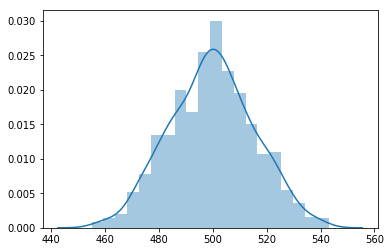

In [12]:
# flip a coin 1000 times and repeat this test 1000 times
sns.distplot(np.random.binomial(1000, 0.5, 1000))

Looking at the results of our coin flipping example above, the result of tests is consistent with our probability of 50% success as can be seen in this distribution of the results. Each value can be calculated as "out of n".